In [1]:
import pandas as pd
import random
import pandas_profiling
import scipy.stats as stats
import seaborn as sns
import numpy as np
import itertools



import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [104]:
data_file_name = "../data/train.csv"
test_file_name = "../data/test.csv"
target_column_name = "HasDetections"

In [4]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64', # was 'float32'
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32', # was 'float16'
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [5]:
p = 0.05
df = pd.read_csv(
        data_file_name,
        header=0, 
        skiprows=lambda i: i>0 and random.random() > p,
        dtype=dtypes
)

In [7]:
blue_features = [
    "Census_MDC2FormFactor",
    "Census_DeviceFamily",
    "Census_OEMNameIdentifier",
    "Census_OEMModelIdentifier",
    "Census_ProcessorCoreCount",
    "Census_ProcessorManufacturerIdentifier",
    "Census_ProcessorModelIdentifier",
    "Census_ProcessorClass",
    "Census_PrimaryDiskTotalCapacity",
    "Census_PrimaryDiskTypeName",
    "Census_SystemVolumeTotalCapacity",
    "Census_HasOpticalDiskDrive",
    "Census_TotalPhysicalRAM",
    "Census_ChassisTypeName"
]
columns = blue_features + [target_column_name]
df = df[columns]

## Compare train and test values distribution

In [106]:
## Check if the train test and the test are from the same distribution
df_test = pd.read_csv(
        test_file_name,
        header=0, 
        skiprows=lambda i: i>0 and random.random() > p,
        dtype=dtypes
)

Census_MDC2FormFactor


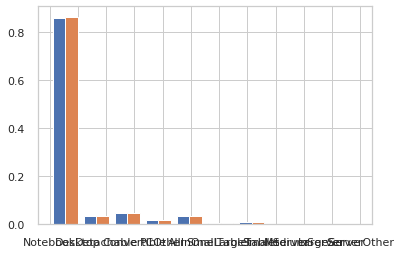

Census_DeviceFamily


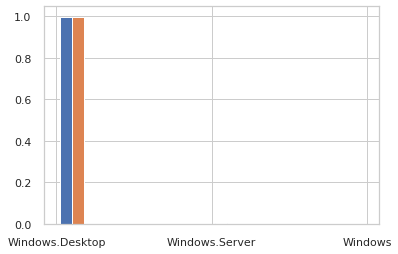

Census_OEMNameIdentifier


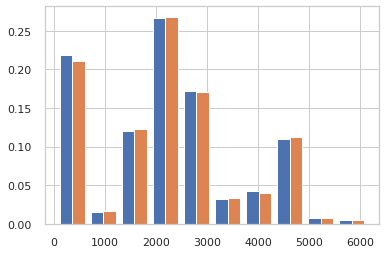

Census_OEMModelIdentifier


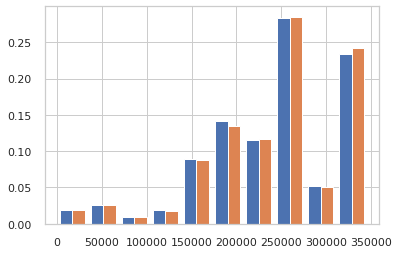

Census_ProcessorCoreCount


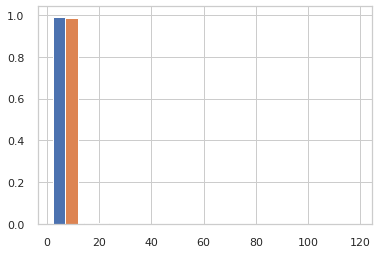

Census_ProcessorManufacturerIdentifier


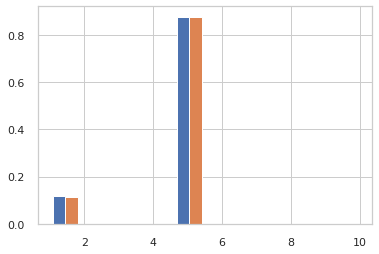

Census_ProcessorModelIdentifier


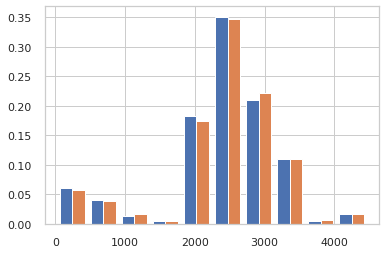

Census_ProcessorClass
Census_PrimaryDiskTotalCapacity


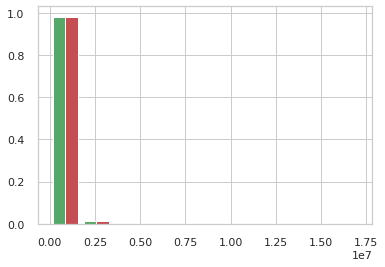

Census_PrimaryDiskTypeName
Census_SystemVolumeTotalCapacity


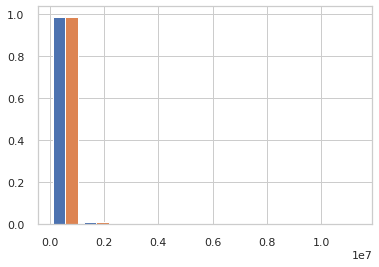

Census_HasOpticalDiskDrive


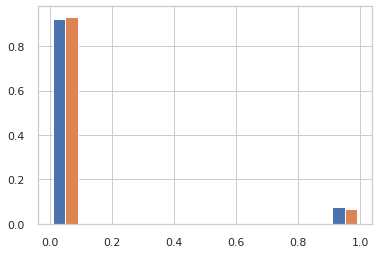

Census_TotalPhysicalRAM


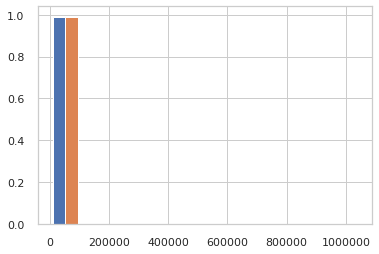

Census_ChassisTypeName


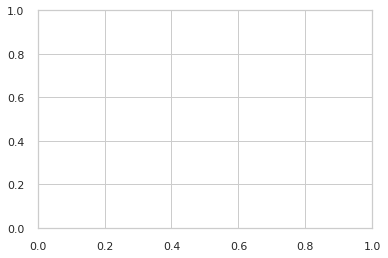

In [113]:
weights=[np.ones(len(df)) / len(df),np.ones(len(df_test)) / len(df_test)]
for column in blue_features:
    try:
        print(column)
        plt.hist([df[column], df_test[column]],weights=weights)
        plt.show()
    except:
        continue

In [116]:
profile_test = pandas_profiling.ProfileReport(df_test[blue_features])
profile_test.to_file("profile_test.html")

/home/yaron/anaconda3/envs/microsoft-challenge/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


/home/yaron/anaconda3/envs/microsoft-challenge/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Distribution of HasDetections

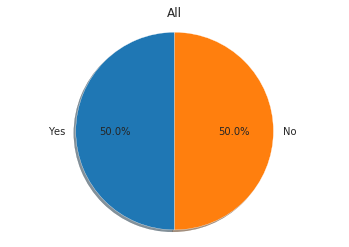

In [6]:
def draw_proportions_of_detections(df, title):
    labels = 'Yes', 'No'
    sizes = [len(df[df[target_column_name] == 1]), len(df[df[target_column_name] == 0])]
    fig1, ax1 = plt.subplots()
    ax1.pie(x=sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(title)
    plt.show()
    
draw_proportions_of_detections(df, 'All')

## Profiling columns
### Profiling the whole file

In [8]:
profile_all = pandas_profiling.ProfileReport(df)
profile_all.to_file("profile_all.html")

IndexError: index 2120 is out of bounds for axis 0 with size 2120

### Profiling where HasDetections=1

In [ ]:
profile_has_detections = pandas_profiling.ProfileReport(df[df[target_column_name] == 1])
profile_has_detections.to_file("profile_has_detections.html")

In [9]:
#TODO: look for unknown values in categorial features and remove missing
#TODO: look for incorrect values in numerical features
#TODO: look for skewed variables
# In features representing model, maybe encode by distribution
# look for correlations between categorial can convert to ordinal and numeric
# identifier
#TODO: fillna
#TODO: choose the best test (anova, t-test, chi-square, cramer, pearson, spearman)
#TODO: confidence interval

categorial_features = ['Census_MDC2FormFactor',
                       'Census_DeviceFamily',
                       'Census_ProcessorManufacturerIdentifier',
                       'Census_OEMNameIdentifier',
                       'Census_OEMModelIdentifier', #maybe ordinal
                       'Census_ProcessorModelIdentifier', #maybe ordinal
                       'Census_ProcessorClass', # a lot of missing values
                       'Census_PrimaryDiskTypeName',
                       'Census_HasOpticalDiskDrive',
                       'Census_ChassisTypeName' # can be ordinal?
                      ]

numeric_features = [
                    'Census_ProcessorCoreCount',
                    'Census_PrimaryDiskTotalCapacity',
                    'Census_SystemVolumeTotalCapacity',
                    'Census_TotalPhysicalRAM'
                   ]

In [10]:
def plot_for_target_categorial(df ,col, log_scale=False):
    plt.figure(figsize=(11,4))
    g = sns.countplot(x=col, hue=target_column_name, data=df,palette=["C1", "C0"],
                      order = df[col].value_counts().iloc[:22].index)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    if log_scale:
        g.set_yscale('log')
    plt.show()
    
def plot_for_target_numeric(df ,col, log_scale=False):
    plt.figure(figsize=(11,4))
    g = sns.distplot(a=df[df[target_column_name] == 0][col], norm_hist=True)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    if log_scale:
        g.set_yscale('log')
    #plt.show()
    #plt.figure(figsize=(11,4))
    g = sns.distplot(a=df[df[target_column_name] == 1][col])
    g.set_xticklabels(g.get_xticklabels(),rotation=90, norm_hist=True)
    if log_scale:
        g.set_yscale('log')
    plt.show()

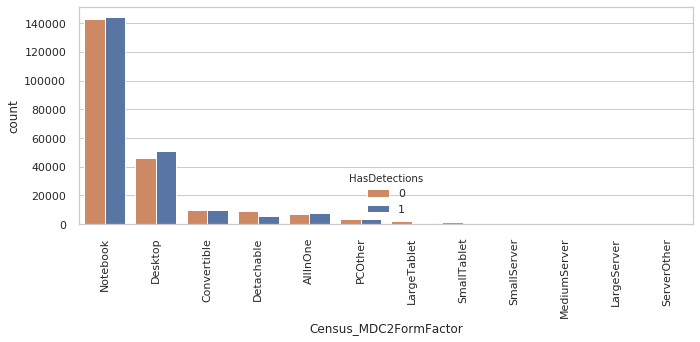

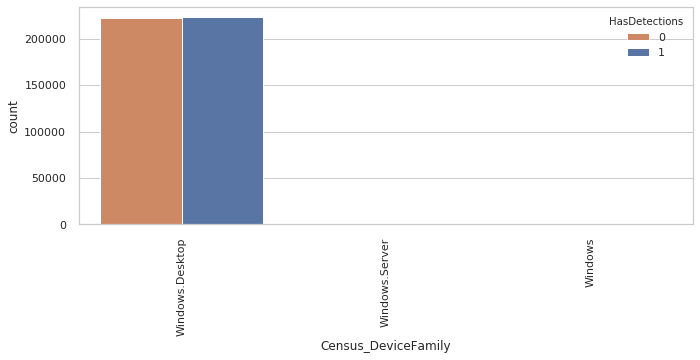

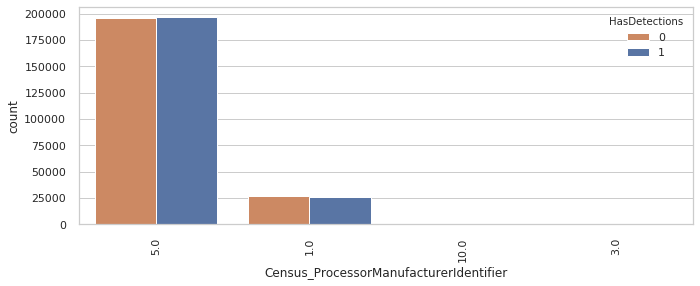

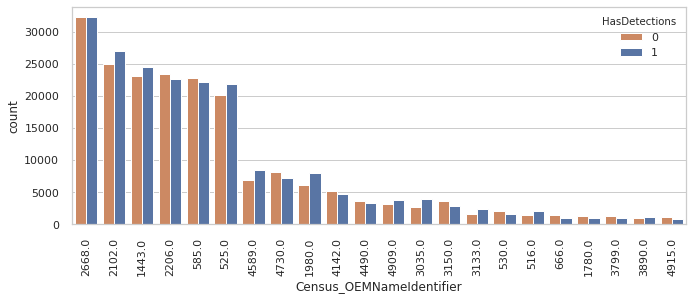

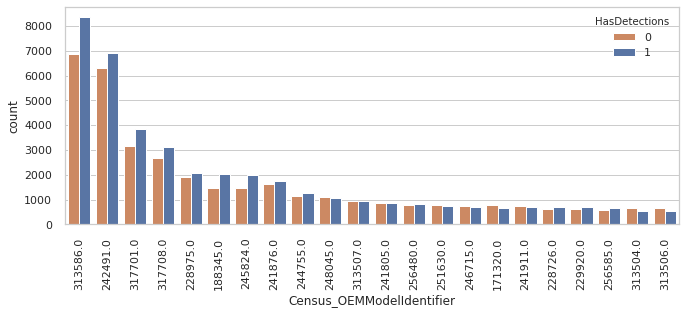

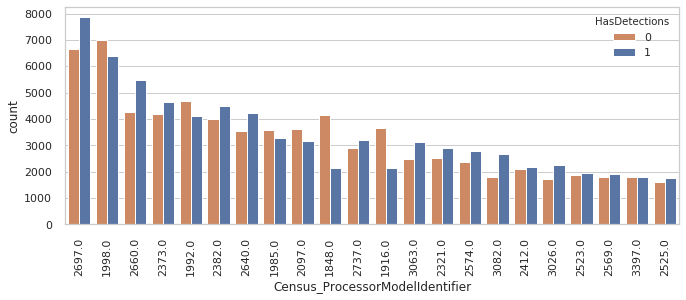

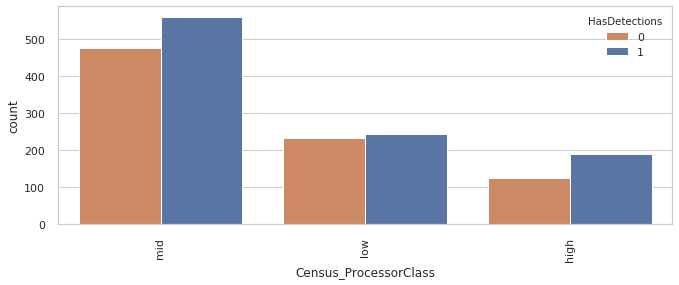

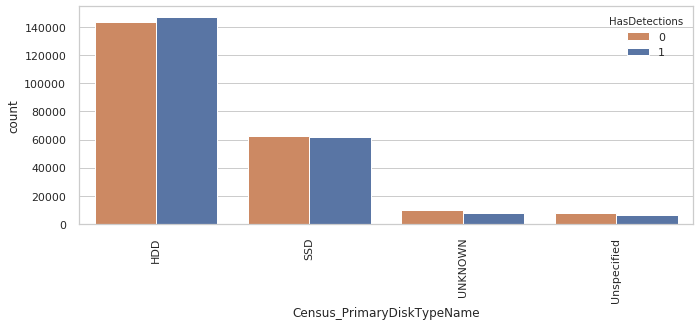

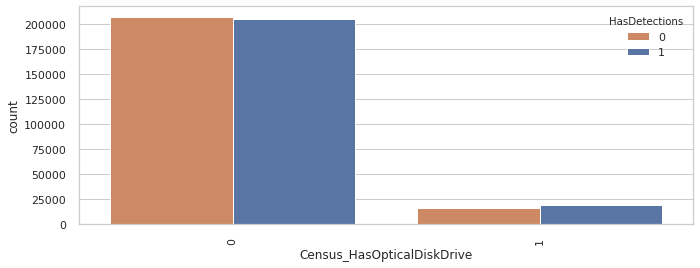

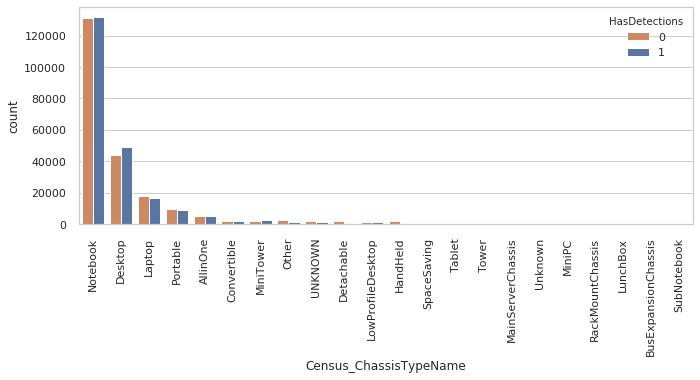

In [23]:
for column in categorial_features:
    plot_for_target_categorial(df, column, log_scale=False)

(array([3.8144e+04, 1.4000e+01, 2.0000e+00, 1.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]), array([ 1. ,  4.9,  8.8, 12.7, 16.6, 20.5, 24.4, 28.3, 32.2, 36.1, 40. ]), <a list of 10 Patch objects>)


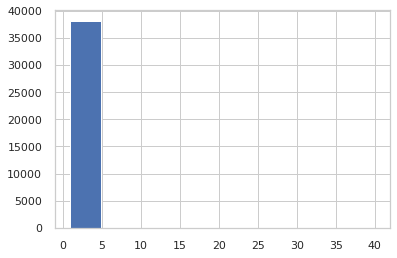

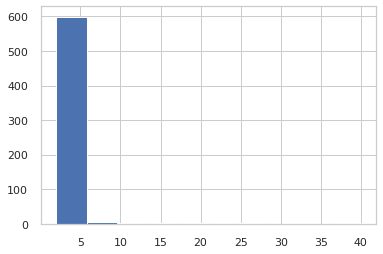

1.5593793209402365% of the models identifiers are associated with two or more names


In [55]:
check = df.groupby(["Census_OEMNameIdentifier", "Census_OEMModelIdentifier"]).size().reset_index().rename(columns={0:'count'})
dict_model_for_two_names = {}
counts = []
for identifier in check["Census_OEMModelIdentifier"].unique():
    name_identifiers = check[check["Census_OEMModelIdentifier"] == identifier]["Census_OEMNameIdentifier"].unique()
    counts.append(len(name_identifiers))
    
n = plt.hist(counts, log=False)
print(n)
plt.show()
big_counts = [a for a in counts if a > 1]
plt.hist(big_counts, log=True)
plt.show()

num_models_for_two_names = len(big_counts)/len(check)
print(f"{num_models_for_two_names*100.0}% of the models identifiers are associated with two or more names")
#print(len(dict_model_for_two_names))
#check2.groupby('count_names').count() 

263176
0.3042901417063099


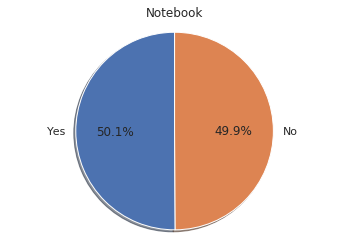

1459
0.40217060967307094


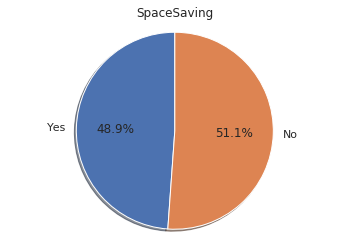

93227
5.608961129587384e-57


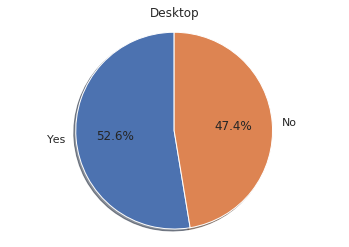

34409
0.00015398234636529196


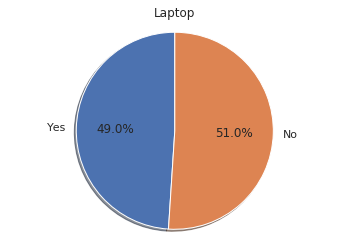

18094
1.0355147695002606e-06


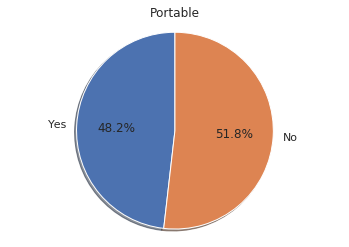

3896
8.00264880061429e-210


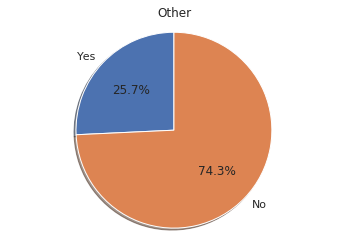

10307
0.004554728482657378


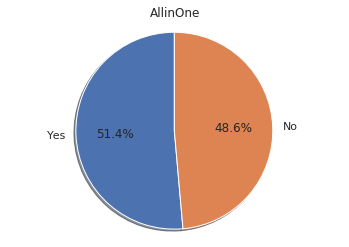

3389
2.0932250158236467e-08


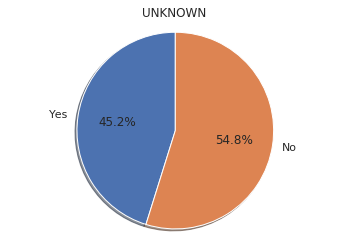

2567
2.3407367754529504e-57


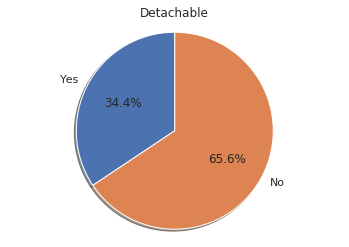

2372
2.3575945660328584e-84


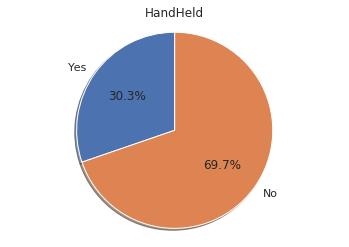

4185
1.800600980778795e-08


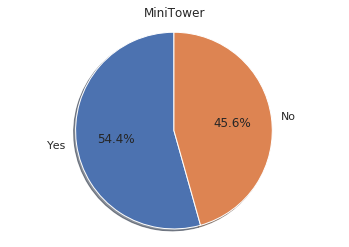

673
1.6816566427810306e-12


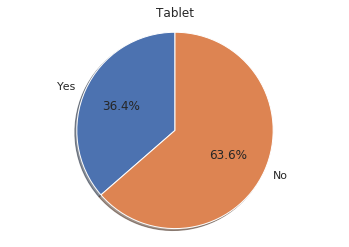

620
0.15977816528599817


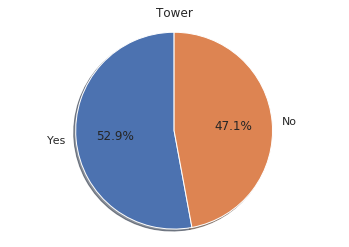

2499
0.1737316421028532


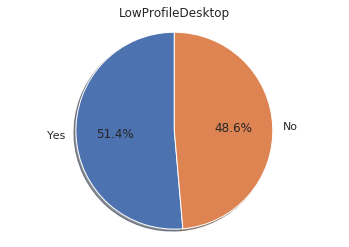

4230
0.035153226492051666


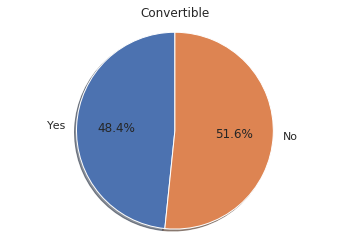

487
1.2787588807640667e-05


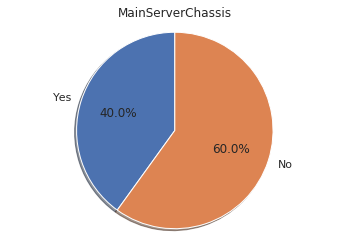

0
1.0


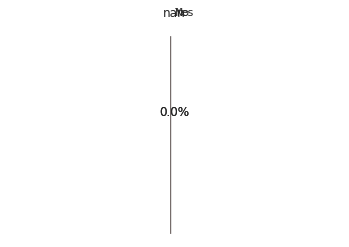

186
3.111307714706793e-06


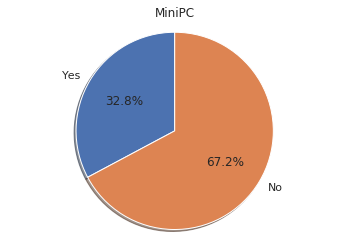

174
1.3051948574186853e-05


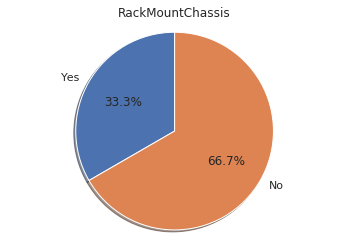

486
0.0009097285373078005


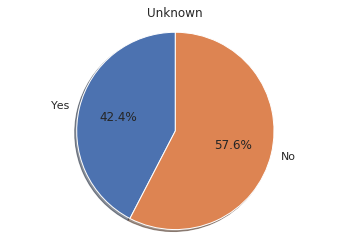

174
0.11112046966152371


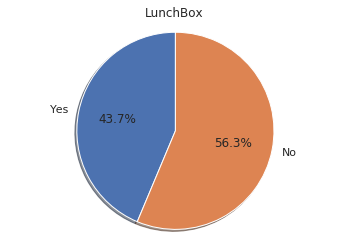

38
0.005097643297631296


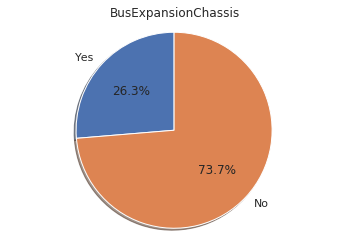

7
0.9999999999999998


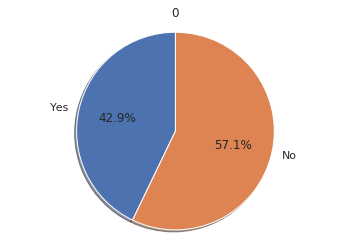

38
0.07295138851623055


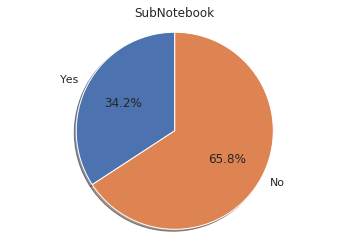

12
0.7744140625000003


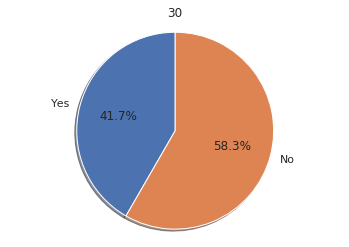

7
0.4531249999999996


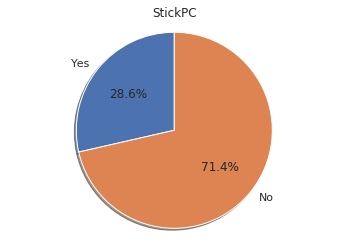

3
1.0


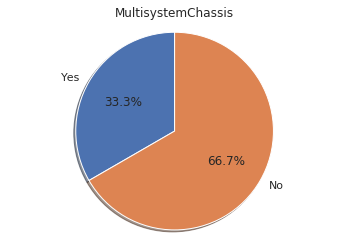

5
1.0


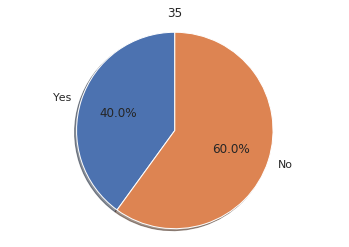

1
1.0


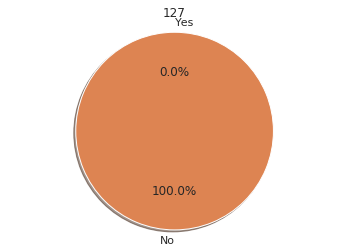

1
1.0


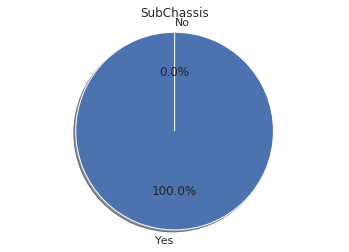

2
1.0


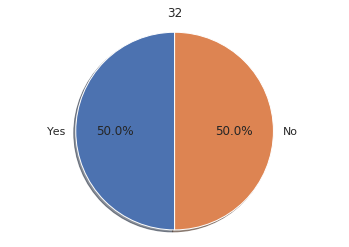

1
1.0


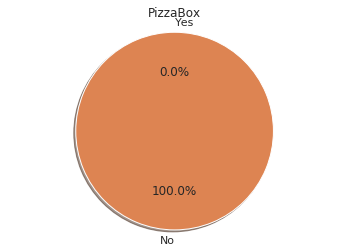

2
1.0


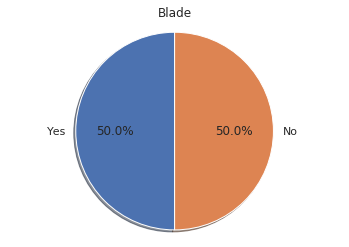

1
1.0


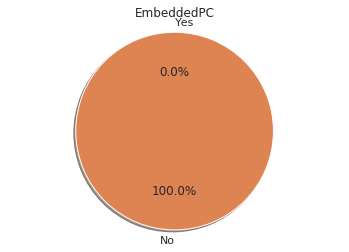

1
1.0


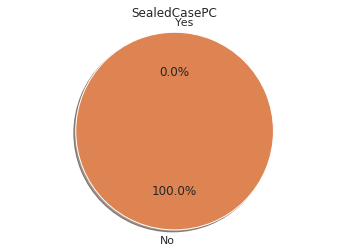

1
1.0


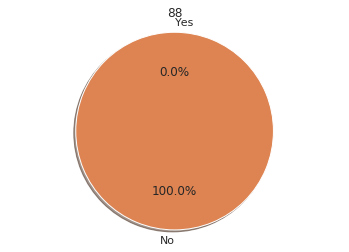

In [36]:
#Printing distributions for some values
from scipy import stats
column = 'Census_ChassisTypeName'
values = df['Census_ChassisTypeName'].unique()
for value in values:
    data = df[df['Census_ChassisTypeName'] == value]
    sizes = [len(data[data[target_column_name] == 1]), len(data[data[target_column_name] == 0])]
    print(len(data))
    print(stats.binom_test(sizes, p=0.5))
    draw_proportions_of_detections(data, value)

## Missing values

Column Census_MDC2FormFactor includes 0 missing values,which is 0.0% of the values
Ttest_indResult(statistic=nan, pvalue=nan)
1.0
Column Census_DeviceFamily includes 0 missing values,which is 0.0% of the values
Ttest_indResult(statistic=nan, pvalue=nan)
1.0
Column Census_OEMNameIdentifier includes 4866 missing values,which is 1.1% of the values


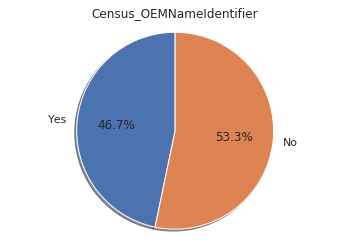

Ttest_indResult(statistic=-4.601883989915296, pvalue=4.188012388684069e-06)
5.470184921319545e-06
Column Census_OEMModelIdentifier includes 5233 missing values,which is 1.2% of the values


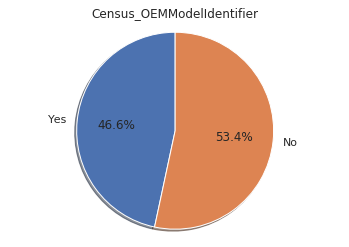

Ttest_indResult(statistic=-4.899642229379761, pvalue=9.604483285694348e-07)
1.2982078714427433e-06
Column Census_ProcessorCoreCount includes 2051 missing values,which is 0.46% of the values


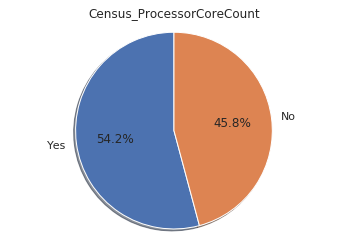

Ttest_indResult(statistic=3.77290190909655, pvalue=0.00016138055024989743)
0.00017281765120472772
Column Census_ProcessorManufacturerIdentifier includes 2051 missing values,which is 0.46% of the values


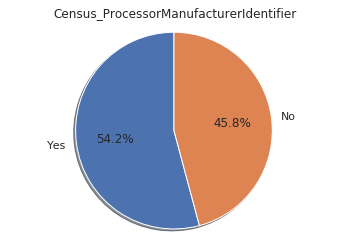

Ttest_indResult(statistic=3.77290190909655, pvalue=0.00016138055024989743)
0.00017281765120472772
Column Census_ProcessorModelIdentifier includes 2051 missing values,which is 0.46% of the values


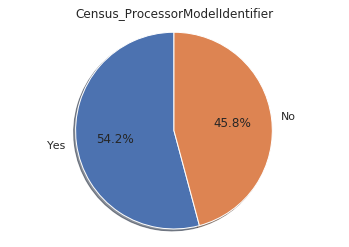

Ttest_indResult(statistic=3.77290190909655, pvalue=0.00016138055024989743)
0.00017281765120472772
Column Census_ProcessorClass includes 444944 missing values,which is 1e+02% of the values


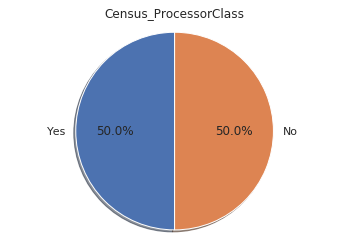

Ttest_indResult(statistic=-3.765478633525763, pvalue=0.00016625161958021053)
0.9462138455799778
Column Census_PrimaryDiskTotalCapacity includes 2653 missing values,which is 0.59% of the values


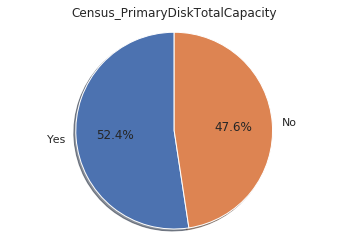

Ttest_indResult(statistic=2.459737926741428, pvalue=0.01390422628854438)
0.014419503967608133
Column Census_PrimaryDiskTypeName includes 607 missing values,which is 0.14% of the values


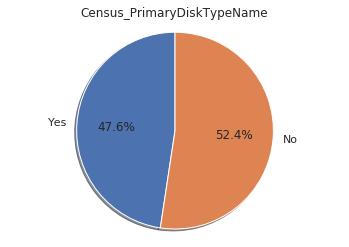

Ttest_indResult(statistic=-1.1842194277378673, pvalue=0.2363268435947351)
0.2557347555987281
Column Census_SystemVolumeTotalCapacity includes 2653 missing values,which is 0.59% of the values


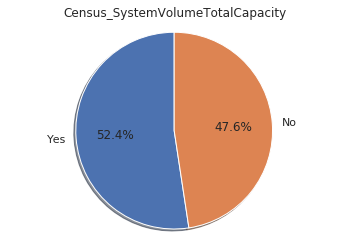

Ttest_indResult(statistic=2.459737926741428, pvalue=0.01390422628854438)
0.014419503967608133
Column Census_HasOpticalDiskDrive includes 0 missing values,which is 0.0% of the values
Ttest_indResult(statistic=nan, pvalue=nan)
1.0
Column Census_TotalPhysicalRAM includes 4060 missing values,which is 0.91% of the values


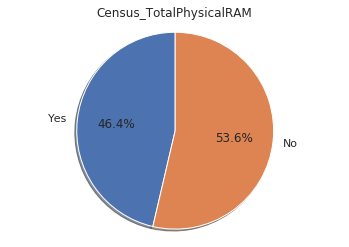

Ttest_indResult(statistic=-4.683293316280402, pvalue=2.823849109725923e-06)
3.626559047970213e-06
Column Census_ChassisTypeName includes 39 missing values,which is 0.0087% of the values


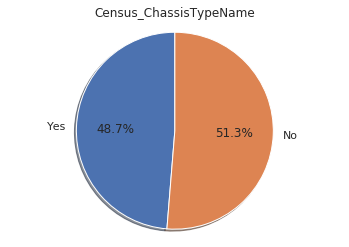

Ttest_indResult(statistic=-0.1617423472427512, pvalue=0.8715088284377104)
0.9999999999999992


In [71]:
for column in blue_features:
    #Fixing to isna instead of isnull
    null_data = df[df[column].isna()]
    not_null_data = df[~df[column].isna()]
    print(f"Column {column} includes {len(null_data)} missing values,"
          f"which is {100.0*(len(null_data)/len(df)):{2}.{2}}% of the values")
    if len(null_data) > 0:
        draw_proportions_of_detections(null_data, column)
    #TODO: binom_test
    result_ttest = stats.ttest_ind(null_data[target_column_name],not_null_data[target_column_name])
    result_binom_test = stats.binom_test([len(null_data[null_data[target_column_name] == 1]),
                                          len(null_data[null_data[target_column_name] == 0])], p=0.5)
    print(result_ttest)
    print(result_binom_test)

In [66]:
name_null = df[df["Census_OEMNameIdentifier"].isna()]
model_null = df[df["Census_OEMModelIdentifier"].isna()]


In [68]:
name_null[name_null["Census_OEMModelIdentifier"].notna()]

,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,HasDetections,Census_ProcessorCoreCount-log,Census_PrimaryDiskTotalCapacity-log,Census_SystemVolumeTotalCapacity-log,Census_TotalPhysicalRAM-log
2894,Desktop,Windows.Desktop,NaN,223944.0,2.0,5.0,1959.0,NaN,476940.0,HDD,476384.0,0,2048.0,Desktop,0,1.584963,18.863451,18.861768,11.000704
4194,Desktop,Windows.Desktop,NaN,294562.0,4.0,5.0,2452.0,NaN,305245.0,HDD,104500.0,0,2048.0,Desktop,0,2.321928,18.219613,16.673157,11.000704
6031,AllInOne,Windows.Desktop,NaN,200547.0,2.0,5.0,2017.0,NaN,114473.0,SSD,113857.0,0,8192.0,Desktop,0,1.584963,16.804660,16.796876,13.000176
6826,Desktop,Windows.Desktop,NaN,275199.0,4.0,5.0,2551.0,NaN,122104.0,SSD,121553.0,1,8192.0,Desktop,1,2.321928,16.897763,16.891238,13.000176
7688,Desktop,Windows.Desktop,NaN,223937.0,2.0,5.0,3208.0,NaN,476938.0,HDD,476936.0,0,2560.0,Desktop,0,1.584963,18.863445,18.863439,11.322492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432412,Desktop,Windows.Desktop,NaN,227561.0,4.0,5.0,2706.0,NaN,953869.0,HDD,482269.0,0,8192.0,Desktop,1,2.321928,19.863433,18.879482,13.000176
435438,Desktop,Windows.Desktop,NaN,273599.0,2.0,5.0,2017.0,NaN,953869.0,HDD,945230.0,0,6144.0,Notebook,1,1.584963,19.863433,19.850307,12.585197
436761,Desktop,Windows.Desktop,NaN,226532.0,2.0,5.0,3505.0,low,238475.0,Unspecified,234131.0,0,1024.0,NaN,1,1.584963,17.863485,17.836963,10.001408
440290,Notebook,Windows.Desktop,NaN,330965.0,4.0,5.0,2863.0,NaN,228936.0,SSD,125644.0,0,4096.0,Laptop,0,2.321928,17.804591,16.938994,12.000352


In [69]:
model_null[model_null["Census_OEMNameIdentifier"].notna()]

,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,HasDetections,Census_ProcessorCoreCount-log,Census_PrimaryDiskTotalCapacity-log,Census_SystemVolumeTotalCapacity-log,Census_TotalPhysicalRAM-log
427,Desktop,Windows.Desktop,3685.0,NaN,2.0,5.0,4327.0,NaN,610480.0,Unspecified,87150.0,1,2048.0,Desktop,1,1.584963,19.219587,16.411230,11.000704
467,Notebook,Windows.Desktop,2206.0,NaN,2.0,5.0,4337.0,NaN,152627.0,HDD,49500.0,0,2048.0,Notebook,1,1.584963,17.219660,15.595170,11.000704
491,Notebook,Windows.Desktop,2206.0,NaN,2.0,5.0,4335.0,NaN,305245.0,UNKNOWN,92160.0,0,3072.0,Notebook,1,1.584963,18.219613,16.491869,11.585432
622,Desktop,Windows.Desktop,1532.0,NaN,16.0,1.0,1283.0,NaN,114473.0,SSD,113858.0,0,16384.0,Desktop,0,4.087463,16.804660,16.796889,14.000088
680,Desktop,Windows.Desktop,2206.0,NaN,2.0,5.0,3210.0,NaN,76319.0,UNKNOWN,75768.0,0,2048.0,LowProfileDesktop,1,1.584963,16.219774,16.209320,11.000704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437924,Notebook,Windows.Desktop,2206.0,NaN,4.0,5.0,2256.0,NaN,152627.0,HDD,74449.0,0,2048.0,Notebook,1,2.321928,17.219660,16.183984,11.000704
439156,AllInOne,Windows.Desktop,2206.0,NaN,2.0,1.0,648.0,NaN,476940.0,HDD,456492.0,0,2048.0,Desktop,1,1.584963,18.863451,18.800233,11.000704
439879,Desktop,Windows.Desktop,2206.0,NaN,4.0,5.0,2551.0,NaN,476940.0,HDD,94660.0,0,2048.0,MiniTower,0,2.321928,18.863451,16.530483,11.000704
442323,Notebook,Windows.Desktop,2206.0,NaN,2.0,5.0,3264.0,NaN,305245.0,HDD,44556.0,0,2048.0,Notebook,0,1.584963,18.219613,15.443364,11.000704


In [75]:
all_null = df[df["Census_OEMNameIdentifier"].isna() & df["Census_OEMModelIdentifier"].isna()]
all_null

,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,HasDetections,Census_ProcessorCoreCount-log,Census_PrimaryDiskTotalCapacity-log,Census_SystemVolumeTotalCapacity-log,Census_TotalPhysicalRAM-log
39,Notebook,Windows.Desktop,NaN,NaN,2.0,5.0,1984.0,NaN,305245.0,HDD,304629.0,0,2048.0,Notebook,1,1.584963,18.219613,18.216699,11.000704
135,Notebook,Windows.Desktop,NaN,NaN,4.0,5.0,2257.0,NaN,305245.0,HDD,47213.0,0,4096.0,Notebook,1,2.321928,18.219613,15.526927,12.000352
291,Notebook,Windows.Desktop,NaN,NaN,4.0,5.0,2581.0,NaN,115712.0,SSD,79719.0,0,8192.0,Notebook,0,2.321928,16.820191,16.282654,13.000176
348,PCOther,Windows.Desktop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,0,NaN,UNKNOWN,0,NaN,NaN,NaN,NaN
378,Desktop,Windows.Desktop,NaN,NaN,8.0,5.0,2895.0,NaN,238475.0,SSD,237924.0,0,8192.0,Desktop,1,3.169925,17.863485,17.860147,13.000176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446015,Desktop,Windows.Desktop,NaN,NaN,4.0,5.0,2706.0,NaN,NaN,UNKNOWN,NaN,0,8192.0,UNKNOWN,0,2.321928,NaN,NaN,13.000176
446241,Desktop,Windows.Desktop,NaN,NaN,2.0,5.0,3211.0,NaN,476940.0,UNKNOWN,95056.0,0,4096.0,Desktop,0,1.584963,18.863451,16.536505,12.000352
446443,Desktop,Windows.Desktop,NaN,NaN,12.0,5.0,3014.0,NaN,228936.0,SSD,228369.0,0,32768.0,Desktop,0,3.700440,17.804591,17.801014,15.000044
446683,Desktop,Windows.Desktop,NaN,NaN,4.0,5.0,2551.0,NaN,953868.0,HDD,953301.0,0,4096.0,Desktop,1,2.321928,19.863432,19.862574,12.000352


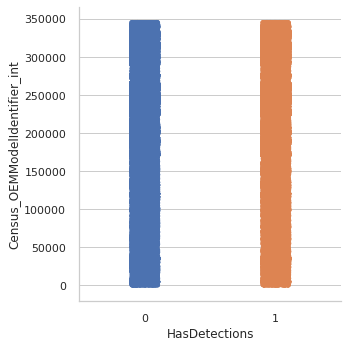

In [82]:
df["Census_OEMModelIdentifier_int"] = pd.to_numeric(df["Census_OEMModelIdentifier"],downcast='integer')
sns.catplot(x="HasDetections", y="Census_OEMModelIdentifier_int", data=df);

([array([  1985.,   9321.,  10347.,  11813.,  14965.,  16785.,  36202.,
          61678.,  69508., 111543., 152077., 162169., 196989., 221001.]),
  array([  2137.,   9121.,  10113.,  11500.,  14830.,  16785.,  36235.,
          61387.,  70354., 109197., 149689., 160523., 195463., 220535.])],
 array([1.7000000e+01, 2.4693643e+04, 4.9370285e+04, 7.4046930e+04,
        9.8723570e+04, 1.2340021e+05, 1.4807686e+05, 1.7275350e+05,
        1.9743014e+05, 2.2210678e+05, 2.4678342e+05, 2.7146006e+05,
        2.9613672e+05, 3.2081334e+05, 3.4549000e+05], dtype=float32),
 <a list of 2 Lists of Patches objects>)

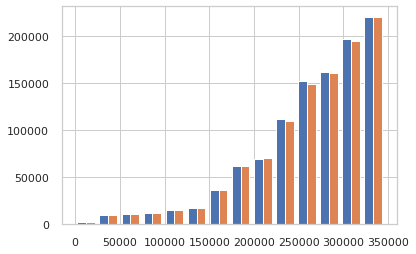

In [101]:
detections = df[df[target_column_name] == 0]["Census_OEMModelIdentifier_int"]
no_detections = df[df[target_column_name] == 1]["Census_OEMModelIdentifier_int"]

plt.hist([no_detections, detections], bins=14, cumulative=True, log=False)

In [103]:
df[["Census_OEMModelIdentifier_int","HasDetections"]].corr()

,Census_OEMModelIdentifier_int,HasDetections
Census_OEMModelIdentifier_int,1.000000,-0.003907
HasDetections,-0.003907,1.000000


In [93]:
result = stats.ttest_ind(detections, no_detections)
result

Ttest_indResult(statistic=nan, pvalue=nan)

## Categorial features

### Check statistical significance

In [13]:
percent_detections = len(df[df[target_column_name] == 1])/len(df)
for column in categorial_features:
    values = df[column].unique()
    if len(values) < 15:
        #TODO: binary t-test or binom test
        pass
    with_detections = df[df[target_column_name] == 1][column].value_counts()
    total = df[column].value_counts(normalize=True)*len(df[df[target_column_name] == 1])
    chi2_result = (((with_detections-total)**2)/total).dropna().sum()
    from scipy.stats import chi2
    p_value = chi2.sf(chi2_result, len(with_detections)-1)
    print(f"For column {column}, the p_value: {p_value}, {len(with_detections)} possible values")
    #TODO: case of missing values in one example

For column Census_MDC2FormFactor, the p_value: 1.0533513301876713e-236, 12 possible values
For column Census_DeviceFamily, the p_value: 1.666085948805382e-07, 3 possible values
For column Census_ProcessorManufacturerIdentifier, the p_value: 2.651718262240539e-05, 4 possible values
For column Census_OEMNameIdentifier, the p_value: 2.5362915046025085e-113, 1047 possible values
For column Census_OEMModelIdentifier, the p_value: 1.0, 24663 possible values
For column Census_ProcessorModelIdentifier, the p_value: 2.5074449890302134e-203, 1872 possible values
For column Census_ProcessorClass, the p_value: 0.0, 3 possible values
For column Census_PrimaryDiskTypeName, the p_value: 3.292396969522824e-48, 4 possible values
For column Census_HasOpticalDiskDrive, the p_value: 1.74328148931227e-21, 2 possible values
For column Census_ChassisTypeName, the p_value: 9.072186593263202e-194, 35 possible values


### Correlations

/home/yaron/anaconda3/envs/microsoft-challenge/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/yaron/anaconda3/envs/microsoft-challenge/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


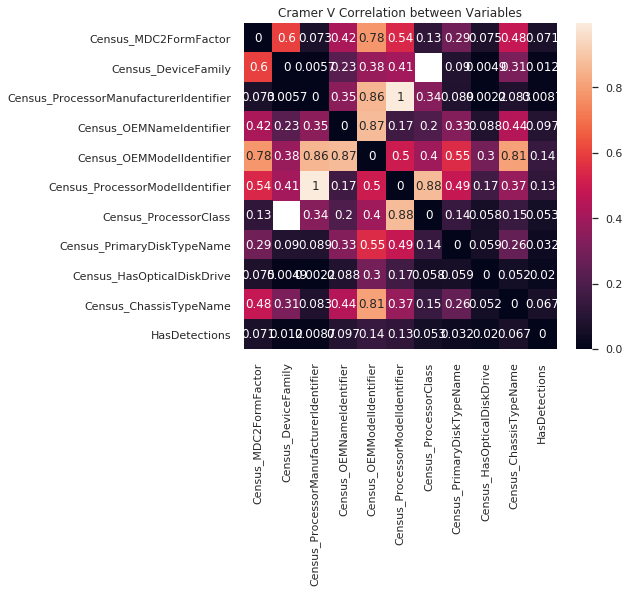

In [29]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

confusion_matrix = pd.crosstab(df[categorial_features[0]], df[categorial_features[1]]).as_matrix()
cols = categorial_features+[target_column_name]
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax)
ax.set_title("Cramer V Correlation between Variables")
ax

In [ ]:
ax

## Numeric features

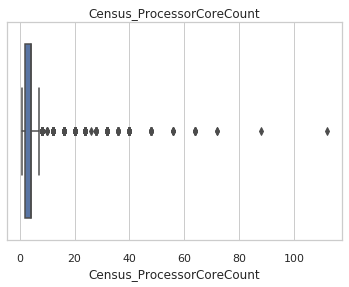

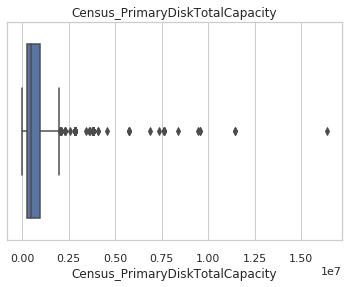

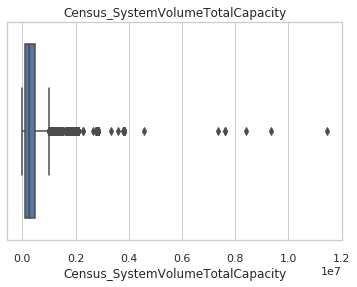

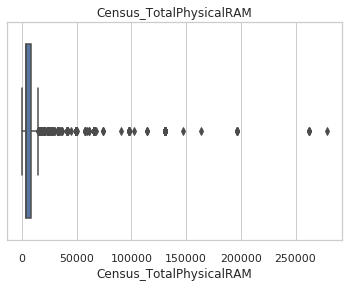

In [117]:
for column in numeric_features:
    sns.set(style="whitegrid")
    ax = sns.boxplot(x=df[column])
    ax.set_title(column)
    plt.show()

Census_ProcessorCoreCount


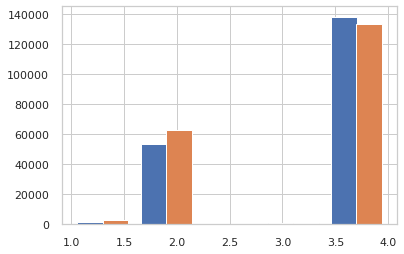

Census_PrimaryDiskTotalCapacity


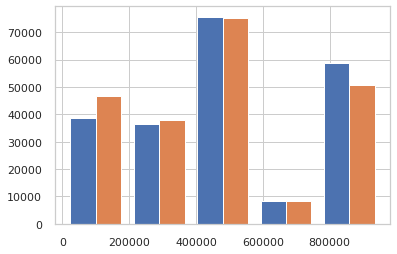

Census_SystemVolumeTotalCapacity


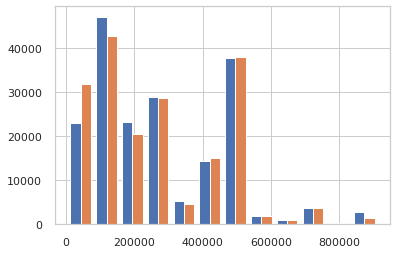

Census_TotalPhysicalRAM


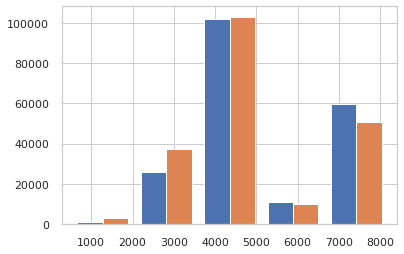

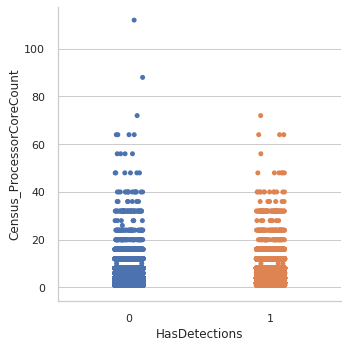

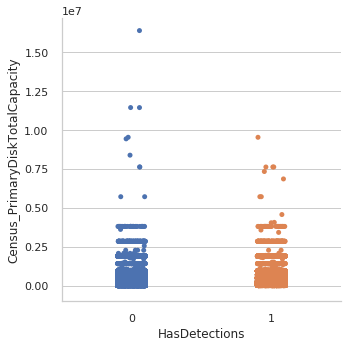

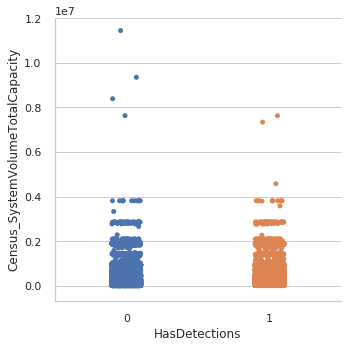

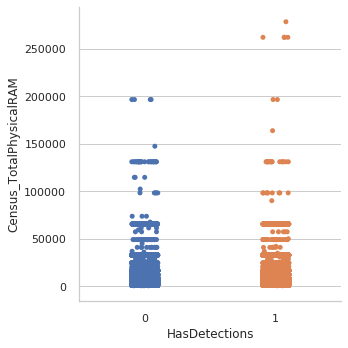

In [129]:
def remove_outliers(x, l_quant, u_quant):
    return x[x.between(x.quantile(l_quant), x.quantile(u_quant))]

for column in numeric_features:
    detections = df[df[target_column_name] == 1][column]
    not_detections = df[df[target_column_name] == 0][column]
    detections = remove_outliers(detections, 0, 0.85)
    not_detections = remove_outliers(not_detections, 0, 0.85)
    print(column)
    plt.hist([detections, not_detections], bins=5+int(len(detections.unique())/10000.0))
    plt.show()
    
for column in numeric_features:
    sns.catplot(x="HasDetections", y=column, data=df);
    plt.show()

### Numeric features correlation

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
corr =df[numeric_features+[target_column_name]].corr(method='pearson')
ax = sns.heatmap(corr, annot=True, ax=ax)
ax.set_title("Pearson Correlation between Variables")
ax

In [ ]:
import math

log_columns =  [f"{column}-log" for column in numeric_features]
for column in numeric_features:
    try:
        df[f"{column}-log"] = df[column].apply(lambda x: math.log(x+1, 2)) #x+1 for zero disributions
        #plot_for_target_numeric(df, f"{column}-log", log_scale=True)
        plot_for_target_numeric(df, f"{column}-log", log_scale=False)
        plot_for_target_numeric(df, column, log_scale=False)
    except:
        pass

In [ ]:
#TODO: other test, whitney
for column in numeric_features:
    result = stats.ttest_ind(df[df[target_column_name] == 0][column],
                             df[df[target_column_name] == 1][column])
    print(result)



In [ ]:
from sklearn.decomposition import PCA

# TODO: change this
df[numeric_features].fillna(0, inplace=True)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numeric_features-['Census_PrimaryDiskTotalCapacity']].values)
result = pd.DataFrame()
result['pca-one'] = pca_result[:,0]
result['pca-two'] = pca_result[:,1] 
result['pca-three'] = df[target_column_name]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=result
    legend="full",
    alpha=0.3
)







In [ ]:
# TODO: boxplot to numerical features regards
# Dataset has 74107 (16.6%) duplicate rows, a lot!!!

In [ ]:
#TODO: unique columns

unique_val = pd.DataFrame(index = [], columns = ['TotalUniqueCount','SharedUniqueCount','TrainUniqueCount','OnlyInTrain','TestUniqueCount', 'OnlyInTest'])
for column in testing_data_columns[1:]:
    unique_val_train = train_data[column].unique()
    unique_val_test = test_data[column].unique()
    
    only_in_training = list(set(unique_val_train) - set(unique_val_test))
    only_in_testing = list(set(unique_val_test) - set(unique_val_train))

    total_unique_val_count = len(set(unique_val_train) | set(unique_val_test))
    shared_unique_val_count = len(set(unique_val_train) & set(unique_val_test))
    
    train_unique_val_count = len(unique_val_train)
    train_only_unique_val_count = len(only_in_training)
    
    test_unique_val_count = len(unique_val_test)
    test_only_unique_val_count = len(only_in_testing)
    
    unique_val.loc[column] = [total_unique_val_count, shared_unique_val_count,
                              train_unique_val_count, train_only_unique_val_count,
                              test_unique_val_count, test_only_unique_val_count]
    
#     print(f'{column}:')
#     print(f'----------------')
#     print(f'Total unique count: {total_unique_count}')
#     print(f'Train unique count: {train_unique_val_count}')
#     print(f'Test unique count: {test_unique_val_count}')
#     print(f'Only in train: {only_in_training[0:5]}{"..." if len(only_in_training) > 5 else ""}')
#     print(f'Only in test: {only_in_testing[0:5]}{"..." if len(only_in_testing) > 5 else ""}')
#     print('=================================================================')
#     print()

unique_val